# Dataset Info
This dataset comprises information of 25000 mutual funds in the United states.
Various attributes related to the mutual fund have been described and these
attributes will be used for making decisions on the rating of the mutual fund by
GreatStone which is a top mutual fund rating agency.
The following files are provided in the form of CSVs. These files contain various
attributes related to the mutual fund. Please find the following files for the
same:
bond_ratings, fund_allocations, fund_config, fund_ratios, fund_specs, other_
specs, return_3year, return_5year, return_10year.

# Domain:
Mutual Fund - Finance

# Objective: 
The goal of this hackathon is to predict GreatStone’s
rating of a mutual fund. In order to help investors decide
on which mutual fund to pick for an investment, the task is
to build a model that can predict the rating of a mutual
fund. The various attributes that define a mutual fund can
be used for building the model

In [102]:
###  Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas_profiling
sns.set(rc={'figure.figsize':(13.7,8.27)}) # setting constant to increase seaborn graph sizes

In [103]:
# Read the data as a data frame
#bond_ratings consists of 12 columns which provide information on the bond rating percentage allocation of the mutual funds
#The tag column is a unique identifier and is also the same as the id.(i.e tag = id)
bond_ratings = pd.read_csv('Hackathon_Files/external/bond_ratings.csv')
#bond_ratings = bond_ratings.fillna(0) #TODO fill meaningfully by finding best corrleation if any
#dropping Rejected columns
bond_ratings.drop('us_govt_bond_rating', axis=1, inplace=True)
#pandas_profiling.ProfileReport(bond_ratings)

In [104]:
#fund_allocations consists of 12 columns which provide information on the sector wise percentage allocation of the mutual funds
fund_allocations = pd.read_csv('Hackathon_Files/external/fund_allocations.csv')

#renaming column id to tag
fund_allocations.rename({'id': 'tag'}, axis=1, inplace=True)
#pandas_profiling.ProfileReport(fund_allocations)


In [105]:
#fund_config comprises of 4 columns which comprise the metadata of the mutual funds
fund_config = pd.read_csv('Hackathon_Files/external/fund_config.csv')
#pandas_profiling.ProfileReport(fund_config)
fund_config['category'] = fund_config.category.astype('category')
fund_config['parent_company'] = fund_config.parent_company.astype('category')
print(fund_config.info())
fund_config.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
category          25000 non-null category
parent_company    25000 non-null category
fund_id           25000 non-null object
fund_name         25000 non-null object
dtypes: category(2), object(2)
memory usage: 495.8+ KB
None


,count,unique,top,freq
category,25000,111,Large Growth,1335
parent_company,25000,761,Fidelity Investments,966
fund_id,25000,25000,363cafdd-aeaf-4f06-be1c-1ccdc3967373,1
fund_name,25000,24958,Hatteras Alternative Mutual Funds Trust - Hatt...,4


In [106]:
#fund_ratios consists of 8 columns which provides information on various fundamental ratios that describe the mutual funds
fund_ratios = pd.read_csv('Hackathon_Files/external/fund_ratios.csv')

fund_ratios['pb_ratio'] = fund_ratios.pb_ratio.astype('float64')
fund_ratios['pc_ratio'] = fund_ratios['pc_ratio'].str.replace(',', '')
fund_ratios['pc_ratio'] = fund_ratios.pc_ratio.astype('float64')
fund_ratios['ps_ratio'] = fund_ratios['ps_ratio'].str.replace(',', '')
fund_ratios['ps_ratio'] = fund_ratios.ps_ratio.astype('float64')
fund_ratios['pe_ratio'] = fund_ratios['pe_ratio'].str.replace(',', '')
fund_ratios['pe_ratio'] = fund_ratios.pe_ratio.astype('float64')
fund_ratios['mmc'] = fund_ratios['mmc'].str.replace(',', '')
fund_ratios['mmc'] = fund_ratios.mmc.astype('float64')
print(fund_ratios.info())
#pandas_profiling.ProfileReport(fund_ratios)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
fund_id                          25000 non-null object
tag                              25000 non-null int64
fund_ratio_net_annual_expense    25000 non-null float64
pb_ratio                         24886 non-null float64
ps_ratio                         24886 non-null float64
mmc                              24886 non-null float64
pc_ratio                         24886 non-null float64
pe_ratio                         24886 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB
None


In [107]:
#fund_specs contains 9 columns which give information about the specifications of the mutual funds
fund_specs = pd.read_csv('Hackathon_Files/external/fund_specs.csv')
#dropping Rejected columns
fund_specs.drop('currency', axis=1, inplace=True)
fund_specs['inception_date']= pd.to_datetime(fund_specs['inception_date'])
fund_specs['enddate'] = pd.Timestamp('2019-12-31')
fund_specs['Age_In_Months'] = ((fund_specs['enddate'] - fund_specs['inception_date'])/np.timedelta64(1, 'M')).astype(int)
fund_specs.drop('enddate', axis=1, inplace=True)
fund_specs['fund_size'] = fund_specs.fund_size.astype('category')
fund_specs['investment_class'].fillna('Unknown', inplace =True)
fund_specs['investment_class'] = fund_specs.investment_class.astype('category')
fund_specs['investment_class'].cat.categories
#pandas_profiling.ProfileReport(fund_specs)

Index(['Blend', 'Growth', 'Unknown', 'Value'], dtype='object')

In [108]:
#other_specs contains 43 columns which give information of the other aspects of the mutual funds
other_specs = pd.read_csv('Hackathon_Files/external/other_specs.csv')
#fund_specs.drop('2013_category_return', axis=1, inplace=True)
#fund_specs.drop('2017_category_return', axis=1, inplace=True)
#sorting column name
other_specs = other_specs.reindex(sorted(other_specs.columns), axis=1)

#dropping Rejected columns
other_specs.drop(['2013_return_fund','2017_return_fund','ytd_return_category','ytd_return_fund'], axis=1, inplace=True)
other_specs['pb_ratio'] = other_specs.pb_ratio.astype('float64')
other_specs['pc_ratio'] = other_specs['pc_ratio'].str.replace(',', '')
other_specs['pc_ratio'] = other_specs.pc_ratio.astype('float64')
other_specs['ps_ratio'] = other_specs['ps_ratio'].str.replace(',', '')
other_specs['ps_ratio'] = other_specs.ps_ratio.astype('float64')
other_specs['pe_ratio'] = other_specs['pe_ratio'].str.replace(',', '')
other_specs['pe_ratio'] = other_specs.pe_ratio.astype('float64')
other_specs['mmc'] = other_specs['mmc'].str.replace(',', '')
other_specs['mmc'] = other_specs.mmc.astype('float64')

#sorting column name
other_specs = other_specs.reindex(sorted(other_specs.columns), axis=1)


# Calculate difference between fund ratio to category 
other_specs['1_month_return_diff'] = other_specs['1_month_fund_return'] - other_specs['category_return_1month']
other_specs['1_year_return_diff'] = other_specs['1_year_return_fund'] - other_specs['category_return_1year']
other_specs['2010_return_diff'] = other_specs['2010_return_fund'] - other_specs['2010_return_category']
other_specs['2011_return_diff'] = other_specs['2011_return_fund'] - other_specs['2011_return_category']
other_specs['2012_return_diff'] = other_specs['2012_fund_return'] - other_specs['2012_return_category']
#other_specs['2013_return_diff'] = other_specs['2013_return_fund'] - other_specs['2013_return_category']
other_specs['2014_return_diff'] = other_specs['2014_return_fund'] - other_specs['2014_category_return']
other_specs['2015_return_diff'] = other_specs['2015_return_fund'] - other_specs['category_return_2015']
other_specs['2016_return_diff'] = other_specs['2016_return_fund'] - other_specs['2016_return_category']
#other_specs['2017_return_diff'] = other_specs['2017_return_fund'] - other_specs['2017_return_category']
other_specs['2018_return_diff'] = other_specs['2018_return_fund'] - other_specs['2018_return_category']

other_specs.drop(['1_month_fund_return','category_return_1month',
                       '1_year_return_fund','category_return_1year',
                       '2010_return_fund','2010_return_category',
                       '2011_return_fund','2011_return_category',
                       '2012_fund_return','2012_return_category',
                       '2014_return_fund','2014_category_return',
                       '2015_return_fund','category_return_2015',
                       '2016_return_fund','2016_return_category',
                       '2018_return_fund','2018_return_category',], axis=1, inplace=True)

other_specs.info()
#pandas_profiling.ProfileReport(other_specs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
2013_category_return                 17363 non-null float64
2017_category_return                 23572 non-null float64
3_months_return_category             24885 non-null float64
bond_percentage_of_porfolio          24886 non-null float64
cash_percent_of_portfolio            24886 non-null float64
category_ratio_net_annual_expense    25000 non-null float64
fund_return_3months                  24885 non-null float64
fund_return_3years                   24885 non-null float64
greatstone_rating                    20000 non-null float64
mmc                                  24886 non-null float64
pb_ratio                             24886 non-null float64
pc_ratio                             24886 non-null float64
pe_ratio                             24886 non-null float64
portfolio_convertable                24886 non-null float64
portfolio_others                     24886 non-null

In [109]:
#return_3years contains 17 columns which give information about 3 year return and ratios
return_3year = pd.read_csv('Hackathon_Files/external/return_3year.csv')
#dropping Rejected columns


#return_3year.drop('fund_return_3years', axis=1, inplace=True)
return_3year['3yrs_treynor_ratio_fund'] = return_3year['3yrs_treynor_ratio_fund'].str.replace(',', '')
return_3year['3yrs_treynor_ratio_fund'] = return_3year['3yrs_treynor_ratio_fund'].astype('float64')

# Calculate difference between fund ratio to category 
return_3year['3yrs_return_diff'] = return_3year['fund_return_3years'] - return_3year['3_years_return_category']
return_3year['3yrs_treynor_ratio_diff'] = return_3year['3yrs_treynor_ratio_fund'] - return_3year['3yrs_treynor_ratio_category']
return_3year['3_years_alpha_diff'] = return_3year['3_years_alpha_fund'] - return_3year['3_years_alpha_category']
return_3year['3years_std_diff'] = return_3year['3years_fund_std'] - return_3year['3years_category_std']
return_3year['3yrs_sharpe_ratio_diff'] = return_3year['3yrs_sharpe_ratio_fund'] - return_3year['3yrs_sharpe_ratio_category']
return_3year['3_years_return_mean_annual_diff'] = return_3year['3_years_return_mean_annual_fund'] - return_3year['3_years_return_mean_annual_category']
return_3year['3years_r_squared _diff'] = return_3year['3years_fund_r_squared'] - return_3year['3years_category_r_squared']
return_3year['beta_3years_diff'] = return_3year['fund_beta_3years'] - return_3year['category_beta_3years']

return_3year.drop(list(return_3year.filter(regex='category')), axis=1, inplace=True)
return_3year.drop(list(return_3year.filter(regex='fund')), axis=1, inplace=True)

#sorting column name
return_3year = return_3year.reindex(sorted(return_3year.columns), axis=1)
return_3year.info()
#pandas_profiling.ProfileReport(return_3year)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
3_years_alpha_diff                 23352 non-null float64
3_years_return_mean_annual_diff    23352 non-null float64
3years_r_squared _diff             23352 non-null float64
3years_std_diff                    23352 non-null float64
3yrs_return_diff                   24885 non-null float64
3yrs_sharpe_ratio_diff             23352 non-null float64
3yrs_treynor_ratio_diff            23352 non-null float64
beta_3years_diff                   23352 non-null float64
tag                                25000 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


In [110]:
#return_5years contains 17 columns which give information about 5 year return and ratios
return_5year = pd.read_csv('Hackathon_Files/external/return_5year.csv')
#dropping Rejected columns
#return_5year.drop('5_years_return_fund', axis=1, inplace=True)

return_5year['5yrs_treynor_ratio_fund'] = return_5year['5yrs_treynor_ratio_fund'].str.replace(',', '')
return_5year['5yrs_treynor_ratio_fund'] = return_5year['5yrs_treynor_ratio_fund'].astype('float64')

# Calculate difference between fund ratio to category 
return_5year['5yrs_return_diff'] = return_5year['5_years_return_fund'] - return_5year['5_years_return_category']
return_5year['5yrs_treynor_ratio_diff'] = return_5year['5yrs_treynor_ratio_fund'] - return_5year['5yrs_treynor_ratio_category']
return_5year['5_years_alpha_diff'] = return_5year['5_years_alpha_fund'] - return_5year['5_years_alpha_category']
return_5year['5years_std_diff'] = return_5year['5years_fund_std'] - return_5year['5years_category_std']
return_5year['5yrs_sharpe_ratio_diff'] = return_5year['5yrs_sharpe_ratio_fund'] - return_5year['5yrs_sharpe_ratio_category']
return_5year['5_years_return_mean_annual_diff'] = return_5year['5_years_return_mean_annual_fund'] - return_5year['5_years_return_mean_annual_category']
return_5year['5years_r_squared _diff'] = return_5year['5years_fund_r_squared'] - return_5year['category_r_squared_5years']
return_5year['beta_5years_diff'] = return_5year['5_years_beta_fund'] - return_5year['5_years_beta_category']

return_5year.drop(list(return_5year.filter(regex='category')), axis=1, inplace=True)
return_5year.drop(list(return_5year.filter(regex='fund')), axis=1, inplace=True)

#sorting column name
return_5year = return_5year.reindex(sorted(return_5year.columns), axis=1)
return_5year.info()
#pandas_profiling.ProfileReport(return_5year)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
5_years_alpha_diff                 21157 non-null float64
5_years_return_mean_annual_diff    21157 non-null float64
5years_r_squared _diff             21157 non-null float64
5years_std_diff                    21157 non-null float64
5yrs_return_diff                   24885 non-null float64
5yrs_sharpe_ratio_diff             21157 non-null float64
5yrs_treynor_ratio_diff            21157 non-null float64
beta_5years_diff                   21157 non-null float64
tag                                25000 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


In [111]:
#return_10years contains 17 columns which give information about 10 year return and ratios
return_10year = pd.read_csv('Hackathon_Files/external/return_10year.csv')
#dropping Rejected columns
#return_10year.drop('10_years_return_fund', axis=1, inplace=True)
return_10year['10yrs_treynor_ratio_fund'] = return_10year['10yrs_treynor_ratio_fund'].str.replace(',', '')
return_10year['10yrs_treynor_ratio_fund'] = return_10year['10yrs_treynor_ratio_fund'].astype('float64')

# Calculate difference between fund ratio to category 
return_10year['10yrs_return_diff'] = return_10year['10_years_return_fund'] - return_10year['10_years_return_category']
return_10year['10yrs_treynor_ratio_diff'] = return_10year['10yrs_treynor_ratio_fund'] - return_10year['10yrs_treynor_ratio_category']
return_10year['10_years_alpha_diff'] = return_10year['10_years_alpha_fund'] - return_10year['10_years_alpha_category']
return_10year['10years_std_diff'] = return_10year['10years_fund_std'] - return_10year['10years_category_std']
return_10year['10yrs_sharpe_ratio_diff'] = return_10year['10yrs_sharpe_ratio_fund'] - return_10year['10yrs_sharpe_ratio_category']
return_10year['10_years_return_mean_annual_diff'] = return_10year['10_years_return_mean_annual_fund'] - return_10year['10_years_return_mean_annual_category']
return_10year['10years_r_squared _diff'] = return_10year['10years_fund_r_squared'] - return_10year['10years_category_r_squared']
return_10year['beta_10years_diff'] = return_10year['10_years_beta_fund'] - return_10year['10_years_beta_category']

return_10year.drop(list(return_10year.filter(regex='category')), axis=1, inplace=True)
return_10year.drop(list(return_10year.filter(regex='_fund')), axis=1, inplace=True)

#sorting column name
return_10year = return_10year.reindex(sorted(return_10year.columns), axis=1)
return_10year.info()

#pandas_profiling.ProfileReport(return_10year)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
10_years_alpha_diff                 16416 non-null float64
10_years_return_mean_annual_diff    16416 non-null float64
10years_r_squared _diff             16416 non-null float64
10years_std_diff                    16416 non-null float64
10yrs_return_diff                   24885 non-null float64
10yrs_sharpe_ratio_diff             16416 non-null float64
10yrs_treynor_ratio_diff            16416 non-null float64
beta_10years_diff                   16416 non-null float64
fund_id                             25000 non-null object
dtypes: float64(8), object(1)
memory usage: 1.7+ MB


In [112]:
#merging all in single data frame
#merging based on tag
result = pd.merge(fund_specs, other_specs, on='tag',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
result = pd.merge(result, bond_ratings, on='tag',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
result = pd.merge(result, return_3year, on='tag',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
result = pd.merge(result, return_5year, on='tag',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
result = pd.merge(result, fund_ratios, on='tag',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
result = pd.merge(result, fund_allocations, on='tag') #let's merge without allocations as allocation has lot of missing values
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 82 columns):
investment_class                          25000 non-null category
total_assets                              24881 non-null float64
yield                                     24873 non-null float64
greatstone_rating                         20000 non-null float64
inception_date                            25000 non-null datetime64[ns]
tag                                       25000 non-null int64
fund_size                                 23520 non-null category
return_ytd                                24892 non-null float64
Age_In_Months                             25000 non-null int32
2013_category_return                      17363 non-null float64
2017_category_return                      23572 non-null float64
3_months_return_category                  24885 non-null float64
bond_percentage_of_porfolio               24886 non-null float64
cash_percent_of_portfolio                

In [113]:
#merging based on fund_id
result2 = pd.merge(fund_config,return_10year , on='fund_id',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
result2 = pd.merge(result2,fund_ratios , on='fund_id',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
allColumnsResult = pd.merge(result,result2 , on='tag',left_index=True, right_index=True,how='outer', suffixes=('', '_y'))
allColumnsResult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 100 columns):
investment_class                          25000 non-null category
total_assets                              24881 non-null float64
yield                                     24873 non-null float64
greatstone_rating                         20000 non-null float64
inception_date                            25000 non-null datetime64[ns]
tag                                       25000 non-null int64
fund_size                                 23520 non-null category
return_ytd                                24892 non-null float64
Age_In_Months                             25000 non-null int32
2013_category_return                      17363 non-null float64
2017_category_return                      23572 non-null float64
3_months_return_category                  24885 non-null float64
bond_percentage_of_porfolio               24886 non-null float64
cash_percent_of_portfolio               

In [114]:
#droppping duplicate columns
allColumnsResult.drop(list(allColumnsResult.filter(regex='_y$')), axis=1, inplace=True)
allColumnsResult.info()
#pandas_profiling.ProfileReport(allColumnsResult)
#treymor ratios are skewed
allColumnsResult.to_csv('CleanedallColumnsResult.csv',index=False)
#allColumnsResult = pd.read_csv('allColumnsResult.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 87 columns):
investment_class                          25000 non-null category
total_assets                              24881 non-null float64
yield                                     24873 non-null float64
greatstone_rating                         20000 non-null float64
inception_date                            25000 non-null datetime64[ns]
tag                                       25000 non-null int64
fund_size                                 23520 non-null category
return_ytd                                24892 non-null float64
Age_In_Months                             25000 non-null int32
2013_category_return                      17363 non-null float64
2017_category_return                      23572 non-null float64
3_months_return_category                  24885 non-null float64
bond_percentage_of_porfolio               24886 non-null float64
cash_percent_of_portfolio                

In [115]:
corr_matrix = allColumnsResult.corr().abs()
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

fund_return_3years                    3_years_return_mean_annual_diff         0.994898
3years_std_diff                       5years_std_diff                         0.990270
3years_r_squared _diff                5years_r_squared _diff                  0.979291
5years_std_diff                       10years_std_diff                        0.972669
return_ytd                            fund_return_3months                     0.972503
beta_3years_diff                      beta_5years_diff                        0.972085
Age_In_Months                         years_up                                0.971820
3years_std_diff                       10years_std_diff                        0.959546
5years_r_squared _diff                10years_r_squared _diff                 0.943495
bond_percentage_of_porfolio           stock_percent_of_portfolio              0.918937
3years_r_squared _diff                10years_r_squared _diff                 0.905100
3_years_return_mean_annual_diff       10_ye

In [116]:
#function to drop corrlated columns above threshold
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    #print(dataset.head(5))


In [117]:
#removing columns having more 0.9 correlation as above .9 indicates strong correlation
correlation(allColumnsResult,0.9)

In [118]:
#sorting column name
allColumnsResult = allColumnsResult.reindex(sorted(allColumnsResult.columns), axis=1)
#allColumnsResult.to_csv('allColumnsResult_without80Corr.csv',index=False)

In [119]:
#finding 5000 funds without rating
fundsWithoutRating = allColumnsResult[allColumnsResult['greatstone_rating'].isnull()]
print(fundsWithoutRating.shape)
fundsWithRating = allColumnsResult[allColumnsResult['greatstone_rating'] >= 0]
print(fundsWithRating.shape)

(5000, 79)
(20000, 79)


In [120]:
#dropping identifier and target columns
#temp
#allColumnsResult= pd.read_csv('allColumnsResult_without80Corr.csv')
allColumnsResult.drop(['tag','fund_name','fund_id','inception_date','fund_size','parent_company'], axis=1, inplace=True)
#investment class highly corrlelated with fund_size

In [20]:
#allColumnsResult.info()
#checking for missing values
#allColumnsResult.isnull().sum()
#treymor ratios are skewed

In [21]:
#cateogry columns
#droppping duplicate columns
#allColumnsResult.drop(list(allColumnsResult.filter(regex='category')), axis=1, inplace=True)

In [121]:
allColumnsResult['duration_bond']=allColumnsResult['duration_bond'].fillna(0)
allColumnsResult['maturity_bond']=allColumnsResult['maturity_bond'].fillna(0)
#allColumnsResult.info()

In [122]:
#find out max min of various fund size
withoutCategory=allColumnsResult.copy()
#withoutCategory
#withoutCategory['investment_class'] = withoutCategory['investment_class'].cat.add_categories('Unknown')
#withoutCategory['investment_class']=withoutCategory['investment_class'].fillna('Unknown', inplace =True)
withoutCategory.info()
#no real inference can be made let's just impute  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 73 columns):
10_years_alpha_diff                       16416 non-null float64
10_years_return_mean_annual_diff          16416 non-null float64
10yrs_return_diff                         24885 non-null float64
10yrs_sharpe_ratio_diff                   16416 non-null float64
10yrs_treynor_ratio_diff                  16416 non-null float64
1_month_return_diff                       24885 non-null float64
1_year_return_diff                        24885 non-null float64
2010_return_diff                          12612 non-null float64
2011_return_diff                          13701 non-null float64
2012_return_diff                          14874 non-null float64
2013_category_return                      17363 non-null float64
2014_return_diff                          17794 non-null float64
2015_return_diff                          19136 non-null float64
2016_return_diff                          2089

In [123]:
# from sklearn.preprocessing import OrdinalEncoder
# encoder = OrdinalEncoder()
# #list of categorical variables
cat_cols = withoutCategory.select_dtypes(include ='category')
# # #This function will encode non-null data and replace it in the original data
# def ordinalencode(data):
#     nonulls = np.array(data.dropna())
#     impute_reshape = nonulls.reshape(-1,1)
#     impute_ordinal = encoder.fit_transform(impute_reshape)
#     data.loc[data.notnull()] = np.squeeze(impute_ordinal)
#     return data
# # #encoding all the categorical data in the data set through looping
# for columns in cat_cols:
#     ordinalencode(withoutCategory[columns])

cat_cols.columns

Index(['category', 'investment_class'], dtype='object')

In [124]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
for column in cat_cols:
    withoutCategory[column] = labelencoder.fit_transform(withoutCategory[column]) #fitting and transforming the desired categorical column.

In [26]:
#withoutCategory.select_dtypes(include ='object')
#withoutCategory['fund_size']=withoutCategory['fund_size'].fillna(-1)#unknown
#print(withoutCategory.fund_size.unique())
print(withoutCategory.investment_class.unique())
print(withoutCategory.category.unique())
withoutCategory.describe().transpose()

[3 1 0 2]
[ 19  42  43  90  13  55  26   0  46  41  63  17  69  94  82  66  14  80
  24  32  93  64   2  50  48  39 107  52  61   4  89  96  57  62  88 109
  29   1  97  22  30  79   5  81  74  38  83  78  53 110  72  77  85  36
  86  18  92  65  75  87 108  27  15  49 104 102  25  45  33   6  47  59
  91  84  71  31  44  51  56  68  20  21   3   8 101  54  28   7  67  10
  70  73 105  11  95  37  34  58  35  12  76  23  16  40  60  99 106  98
 100 103   9]


,count,mean,std,min,25%,50%,75%,max
10_years_alpha_category,24894.0,1.135615e-03,2.779501e-02,-0.11,-2.000000e-02,0.000000e+00,1.000000e-02,1.000000e-01
10_years_alpha_fund,16416.0,-3.147539e-03,3.275580e+00,-25.97,-1.740000e+00,-3.000000e-01,1.280000e+00,1.486000e+01
10_years_beta_category,24894.0,9.075681e-03,5.492758e-03,-0.02,1.000000e-02,1.000000e-02,1.000000e-02,1.200000e-01
10_years_beta_fund,16416.0,9.632219e-01,1.582636e+00,-88.06,8.600000e-01,1.010000e+00,1.130000e+00,4.929000e+01
10_years_return_mean_annual_category,24894.0,7.680967e-03,4.513989e-03,-0.02,1.000000e-02,1.000000e-02,1.000000e-02,2.000000e-02
10_years_return_mean_annual_fund,16416.0,8.585788e-01,4.589935e-01,-3.64,5.300000e-01,9.000000e-01,1.200000e+00,3.280000e+00
10yrs_sharpe_ratio_category,24894.0,9.510725e-03,2.253745e-03,-0.01,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
10yrs_sharpe_ratio_fund,16416.0,9.374945e-01,3.422704e-01,-6.58,8.000000e-01,9.600000e-01,1.120000e+00,3.010000e+00
10yrs_treynor_ratio_category,24894.0,1.388387e-01,4.425536e-01,-0.19,7.000000e-02,1.000000e-01,1.400000e-01,4.680000e+00
10yrs_treynor_ratio_fund,16416.0,1.029826e+01,1.415576e+02,-4448.68,6.580000e+00,1.029000e+01,1.380000e+01,1.035124e+04


In [125]:
#lets impute float64 values
from fancyimpute import IterativeImputer
mice_impute = IterativeImputer(n_nearest_features=5,initial_strategy='median',verbose=2)
greatstone_rating_col = withoutCategory['greatstone_rating'].copy()
withoutCategory.drop('greatstone_rating', axis=1, inplace=True)
withoutCategoryImputed = mice_impute.fit_transform(withoutCategory.select_dtypes(include ='float64'))
withoutCategoryImputed = pd.DataFrame.from_records(withoutCategoryImputed,index=withoutCategory.select_dtypes(include ='float64').index, columns=withoutCategory.select_dtypes(include ='float64').columns)

#adding back the non numeric columns
withoutCategoryImputed['greatstone_rating']=greatstone_rating_col
withoutCategoryImputed['investment_class']=withoutCategory['investment_class']
withoutCategoryImputed['category']=withoutCategory['category']
#withoutCategoryImputed['parent_company']=withoutCategory['parent_company']

withoutCategoryImputed.describe().transpose()

[IterativeImputer] Completing matrix with shape (25000, 69)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.77
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.54
[IterativeImputer] Early stopping criterion reached.


,count,mean,std,min,25%,50%,75%,max
10_years_alpha_diff,25000.0,1.302739e-01,3.022937e+00,-25.970000,-1.307441e+00,-1.300000e-01,1.260000e+00,1.487000e+01
10_years_return_mean_annual_diff,25000.0,8.262399e-01,4.189374e-01,-3.620000,5.100000e-01,8.500000e-01,1.130000e+00,3.280000e+00
10yrs_return_diff,25000.0,-3.061369e+00,5.442769e+00,-38.210000,-6.690000e+00,-8.200000e-01,4.300000e-01,4.066000e+01
10yrs_sharpe_ratio_diff,25000.0,9.297934e-01,2.931437e-01,-6.590000,8.204629e-01,9.575691e-01,1.072333e+00,3.000000e+00
10yrs_treynor_ratio_diff,25000.0,1.007458e+01,1.148538e+02,-4453.360000,7.340000e+00,1.008000e+01,1.244000e+01,1.034656e+04
1_month_return_diff,25000.0,9.063798e-02,1.234736e+00,-14.330000,-3.200000e-01,5.000000e-02,4.300000e-01,1.610000e+01
1_year_return_diff,25000.0,-1.321304e-01,4.581378e+00,-35.940000,-1.650000e+00,-9.000000e-02,1.370000e+00,5.853000e+01
2010_return_diff,25000.0,-9.198862e-01,3.897775e+00,-42.900000,-3.437535e+00,-6.100000e-01,9.900000e-01,3.514000e+01
2011_return_diff,25000.0,6.303891e-01,3.293706e+00,-32.270000,-4.600000e-01,6.128544e-01,1.660985e+00,2.850000e+01
2012_return_diff,25000.0,1.420570e-01,2.999341e+00,-36.650000,-1.206476e+00,2.000000e-02,1.126250e+00,2.618000e+01


# Attribute Information:



In [126]:
# creating dummy variables
# for col in noMissingDF.select_dtypes(include=['object']).columns:
#    print(col)
encodedDf = pd.get_dummies(withoutCategoryImputed,columns=cat_cols.columns)
encodedDf.shape

(25000, 185)

In [29]:
# TOD 2018 - inception date year = years up+ down ,this can be used to missing populate year up down #fill 0 where both numbers years up and down are 0
# duration_bond and maturity_bond have correlation can be used to fill
#fund allocation all columns are blank , 100% allocation can be filled based on some correlation with fund style I suppose
# fund ratio expense ration available for all, other ratios are all available or not availbale at all
# fund spec inception date available for all (fund age can be derived for fund till date) , fund size large medium small can be derived from  total asset count
# return files category beta,sharpe,mean have limited range of value can filled to make complete all category columns can be ignored initially , category 3,5,10 can be used to find consistency among return and comparison of fund performance against category
# other specs have yearly fund return and yearly category returns , other columns can be used to fill data if necessary
# allColumnsResult.fillna({'years_up':0, 'years_up':0}, inplace=True)
# allColumnsResult['years_up'].fillna(0)
# allColumnsResult['years_down'].fillna(0)
# allColumnsResult[allColumnsResult['years_up'].isnull() & allColumnsResult['years_down'].isnull()].shape

In [30]:
## 5 point summary of attributes
#encodedDf.describe().transpose()

In [127]:
#applying box-cox to the skewed variables
#we can also try Jarque–Bera test
#pandas_profiling.ProfileReport(encodedDf)
encodedDf.skew().sort_values(ascending=False)

category_9                          111.796690
ps_ratio                             90.333959
category_98                          79.042709
category_106                         59.739912
category_103                         55.878216
category_101                         52.679324
category_12                          43.821318
pc_ratio                             43.543192
10yrs_treynor_ratio_diff             42.683326
category_34                          40.790525
category_44                          40.790525
category_99                          40.790525
category_100                         39.492883
category_48                          35.315017
pe_ratio                             35.239549
category_35                          32.230301
category_10                          31.577217
category_45                          30.962147
category_16                          30.962147
category_11                          30.381537
pb_ratio                             30.186536
category_56  

In [32]:
#using boxcox to  to normalize
#encodedDf['total_assets'].min()
# lamda = 0.15
# from scipy.special import boxcox1p
# encodedDf['ps_ratio']= boxcox1p(encodedDf['ps_ratio'],lamda)
# encodedDf['pc_ratio']= boxcox1p(encodedDf['pc_ratio'],lamda)
# encodedDf['pe_ratio']= boxcox1p(encodedDf['pe_ratio'],lamda)
# encodedDf['pb_ratio']= boxcox1p(encodedDf['pb_ratio'],lamda)
# encodedDf['total_assets']= boxcox1p(encodedDf['total_assets'],lamda)
# encodedDf['portfolio_preferred']= boxcox1p(encodedDf['portfolio_preferred'],lamda)

#normalize negative skew 

# encodedDf['10yrs_treynor_ratio_fund']= stats.boxcox(encodedDf['10yrs_treynor_ratio_fund'])[0].astype(float64)
# encodedDf['3yrs_treynor_ratio_fund']= stats.boxcox(encodedDf['3yrs_treynor_ratio_fund'])[0].astype(float64) #replace 4000 by 1700
# encodedDf['5yrs_treynor_ratio_fund']= stats.boxcox(encodedDf['5yrs_treynor_ratio_fund'])[0].astype(float64) #replace by 1200
# encodedDf['10_years_beta_fund']= stats.boxcox(encodedDf['10_years_beta_fund'])[0].astype(float64)

In [128]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [129]:
encodedDf['pc_ratio']=encodedDf['pc_ratio'].fillna(0)

In [130]:
#finding 5000 funds without rating
encodedDf= encodedDf.round(3)
TestFunds = encodedDf[encodedDf['greatstone_rating'].isnull()]
print(TestFunds.shape)
TrainFunds = encodedDf[encodedDf['greatstone_rating'] >= 0]
print(TrainFunds.isna().sum())
#TrainFunds.to_csv('TrainFunds.csv',index=False)

(5000, 185)
10_years_alpha_diff                 0
10_years_return_mean_annual_diff    0
10yrs_return_diff                   0
10yrs_sharpe_ratio_diff             0
10yrs_treynor_ratio_diff            0
1_month_return_diff                 0
1_year_return_diff                  0
2010_return_diff                    0
2011_return_diff                    0
2012_return_diff                    0
2013_category_return                0
2014_return_diff                    0
2015_return_diff                    0
2016_return_diff                    0
2017_category_return                0
2018_return_diff                    0
3_months_return_category            0
3_years_alpha_diff                  0
3years_r_squared _diff              0
3years_std_diff                     0
3yrs_return_diff                    0
3yrs_sharpe_ratio_diff              0
3yrs_treynor_ratio_diff             0
5_years_alpha_diff                  0
5_years_return_mean_annual_diff     0
5yrs_return_diff                    0


In [131]:
TrainFunds=remove_outlier(TrainFunds,'10yrs_treynor_ratio_diff')
TrainFunds=remove_outlier(TrainFunds,'3yrs_treynor_ratio_diff')
TrainFunds=remove_outlier(TrainFunds,'5yrs_treynor_ratio_diff')
TrainFunds=remove_outlier(TrainFunds,'beta_3years_diff')
TrainFunds=remove_outlier(TrainFunds,'beta_10years_diff')

In [132]:
# Split Train/Test data 80:20 ratio
from sklearn.model_selection import train_test_split
#separating target column
y = TrainFunds['greatstone_rating']
#removing target column from features
X = TrainFunds.loc[:, TrainFunds.columns != 'greatstone_rating']
#70:30 train test division
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15510, 184) (3878, 184) (15510,) (3878,)


In [133]:
col_mask=X_test.isnull().any(axis=0) 
row_mask=X_test.isnull().any(axis=1)
X_test.loc[row_mask,col_mask]

""


In [134]:
col_mask=X_train.isnull().any(axis=0) 
row_mask=X_train.isnull().any(axis=1)
X_train.loc[row_mask,col_mask]

""


In [135]:
# Randomforest Model without parameter tuning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=28)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
rf=rf.fit(X_train, y_train)
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 28,
 'verbose': 0,
 'warm_start': False}


C:\Users\phlegmatic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

def calculate_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred)) 
print("Classification_report \n" ,metrics.classification_report(y_test, y_pred))

[[ 272    0    2    1    1    0]
 [   0  174   75   15    0    0]
 [   1   52  583  173    9    0]
 [   0    9  158 1042  135    1]
 [   0    2   14  218  593   51]
 [   0    1    2   11   99  184]]
0.7343991748323878
Classification_report 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       276
         1.0       0.73      0.66      0.69       264
         2.0       0.70      0.71      0.71       818
         3.0       0.71      0.77      0.74      1345
         4.0       0.71      0.68      0.69       878
         5.0       0.78      0.62      0.69       297

    accuracy                           0.73      3878
   macro avg       0.77      0.74      0.75      3878
weighted avg       0.74      0.73      0.73      3878



Text(0.5, 0, 'Relative Importance')

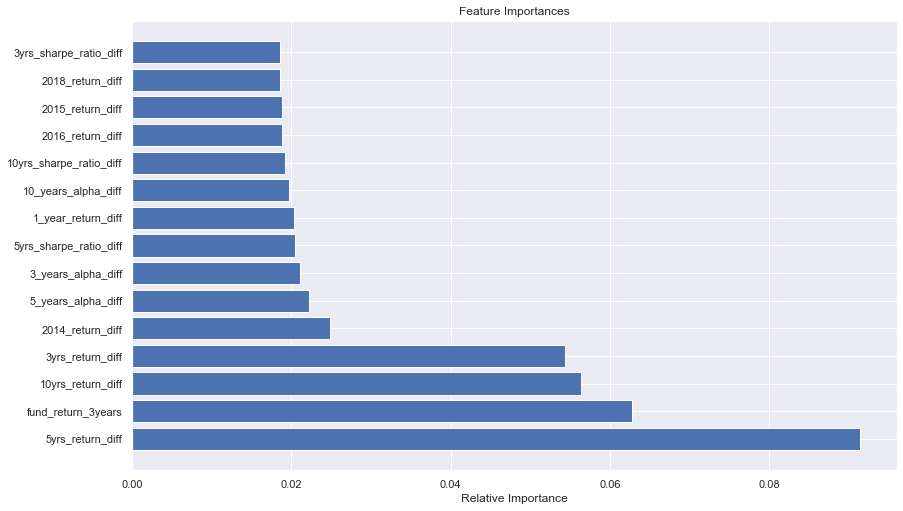

In [136]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = encodedDf.columns[:]
features= a.drop('greatstone_rating',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

As we can see 3 year return is most important feature followed by 3year,5 year alpha 

In [137]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)
print("Train Accuracy:",(trainResult*100.0))
print("Test Accuracy:" ,(testResult*100.0))

Train Accuracy: 99.24564796905221
Test Accuracy: 77.53996905621455


In [138]:
#Hyper Parameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 800, num = 2)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(80, 100, num =2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [False],
 'max_depth': [80, 100, None],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [3],
 'n_estimators': [600, 800]}


In [139]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 4, cv = 5, verbose=2, random_state=42,n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [140]:
#best parameters from fitting the random search:
rf_random.best_params_
# {n_estimators': 800,
#  'min_samples_split': 3,
#  'min_samples_leaf': 2,
#  'max_features': 'sqrt',
#  'max_depth': 110,
#  'bootstrap': False}

{'n_estimators': 600,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [47]:
#Evaluate Random Search
#To determine if random search yielded a better model, we compare the base model with the best random search model.
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.2659 degrees.
Accuracy = -inf%.


In [141]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.1919 degrees.
Accuracy = -inf%.
Improvement of nan%.


C:\Users\phlegmatic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search using 3 folds
param_grid = {
    'bootstrap': [False],
    'max_depth': [100],
    'max_features': ['auto'],
    'min_samples_leaf': [2],
    'min_samples_split': [3],
    'n_estimators': [600]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model with kfold where k=5
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [50]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 600}

In [51]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.2243 degrees.
Accuracy = -inf%.
Improvement of nan%.


C:\Users\phlegmatic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [148]:
num_folds = 5
seed = 28
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# kfold = KFold(n_splits=num_folds, random_state=seed)
# results = cross_val_score(best_random, X_train, y_train, cv=kfold)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=num_folds, random_state=None)
results = cross_val_score(best_random, X_train, y_train, cv=kfold)

print(results)
print("All column cross_val_score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))



[0.79505027 0.79118329 0.80355762 0.79505027 0.79876161 0.79899303]
All column cross_val_score: 79.710% (0.390%)


acc_score 0.816400206291903
Classification_report 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       266
         1.0       0.86      0.66      0.75       271
         2.0       0.78      0.79      0.79       808
         3.0       0.80      0.85      0.83      1359
         4.0       0.81      0.80      0.80       903
         5.0       0.84      0.75      0.79       271

    accuracy                           0.82      3878
   macro avg       0.85      0.81      0.82      3878
weighted avg       0.82      0.82      0.82      3878

Confusion_matrix 
 [[ 260    1    1    4    0    0]
 [   3  178   84    6    0    0]
 [   0   26  642  136    4    0]
 [   1    1   88 1160  105    4]
 [   0    0    3  142  722   36]
 [   0    0    0    3   64  204]]


Text(0.5, 1, 'Confusion Matrix')

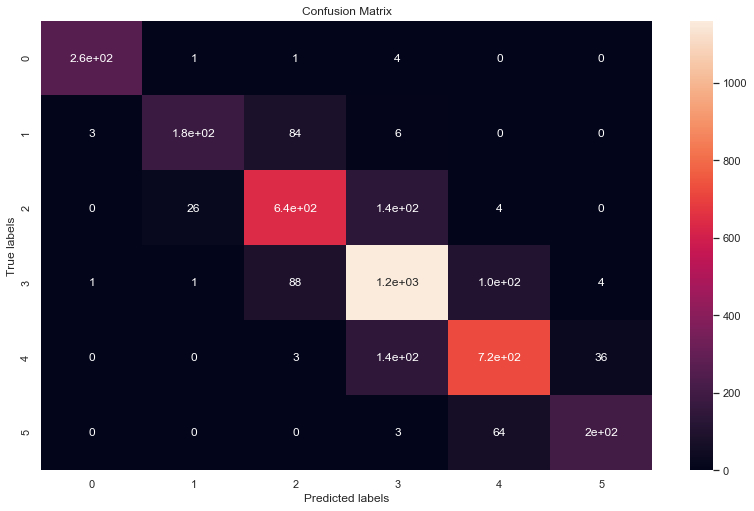

In [149]:
from sklearn import metrics
y_predict = best_random.predict(X_test)
acc_score = best_random.score(X_test, y_test)
print("acc_score", acc_score)
print("Classification_report \n" ,metrics.classification_report(y_test, y_predict))
print("Confusion_matrix \n",metrics.confusion_matrix(y_test, y_predict))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')


In [150]:
#separating target column
Ty = TestFunds['greatstone_rating']
#removing target column from features
TX = TestFunds.loc[:, TestFunds.columns != 'greatstone_rating']
#predicting ty predict
Ty_predict = best_random.predict(TX)

In [151]:
OrigColumnsResult= pd.read_csv('allColumnsResult_without80Corr.csv')
withoutratings = OrigColumnsResult[OrigColumnsResult['greatstone_rating'].isnull()]
output = withoutratings[['fund_id']].copy()
output['greatstone_rating'] = Ty_predict.tolist()
output.info()
print(output.tail(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 24999
Data columns (total 2 columns):
fund_id              5000 non-null object
greatstone_rating    5000 non-null float64
dtypes: float64(1), object(1)
memory usage: 117.2+ KB
                                    fund_id  greatstone_rating
24983  fc278788-24bf-4844-a538-d8c67d47275c                3.0
24992  0a3c101f-c969-4e85-8395-3dc3e33dd3d6                4.0
24996  12fc8949-6563-4dd4-a7cc-0400131fa6ab                3.0
24998  65421547-1407-4c50-92dc-e1cb1e9972dd                2.0
24999  e0284aeb-630a-4499-8745-2a9abba49528                2.0


In [152]:
submission= pd.read_csv('Hackathon_Files\external\sample_submission.csv')
result = submission.join(output.set_index('fund_id'), on = 'fund_id',lsuffix='t')
result.drop(['greatstone_ratingt'],axis=1,inplace=True)
import datetime
current_date = datetime.datetime.now()
filename = str(current_date.day)+str(current_date.month)+str(current_date.year)+str(current_date.hour)+str(current_date.minute)+str(current_date.second)
result.to_csv(str(filename + '.csv'),index=False)

# Findings

Because we have normalized key column like age, credit_amount using boxcox method. Also the weak corelations between categorical columns allowed us to drop certain columns and make our model simpler.

Hyper parameter tuning using random search as well as GridSearchCV improved the accuracy of our model further. K-fold validation gives 99% accuracy to our model which gives us lot of confidence to classify the person profile as good credit or bad credit.